In [2]:
#Import  the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
import re
import time 
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
#Store headlines data into df_ethereum_headlines
df_ethereum_headlines = pd.read_csv('df_ethereum_headlines.csv')
#Remove the first column 
df_ethereum_headlines= df_ethereum_headlines.drop('Unnamed: 0', axis=1)

In [4]:
#Show the dataset
df_ethereum_headlines.head(15)

,headlines,news_center,time,website
0,"Here’s What Could Be Next for Bitcoin, Ethereu...",The Daily Hodl,5-23-2021,https://dailyhodl.com/2021/05/23/heres-what-co...
1,How Leveraged Positions Could Have Accelerated...,Bitcoinist.com,5-23-2021,https://coinmarketcap.com/headlines/news/how-l...
2,Confirmed: Ethereum’s Berlin hard fork solved ...,Finbold,5-23-2021,https://finbold.com/confirmed-ethereums-berlin...
3,These 3 factors will determine if Ethereum’s r...,AMBCrypto,5-23-2021,https://ambcrypto.com/these-3-factors-will-det...
4,Bitcoin & Ethereum: Here’s the reality check o...,AMBCrypto,5-23-2021,https://ambcrypto.com/bitcoin-ethereum-heres-t...
5,Crypto Market Tanks 14% to 3-Month Low Under $...,Coingape,5-23-2021,https://coinmarketcap.com/headlines/news/crypt...
6,Goldman Sachs: Ethereum (ETH) Might Overtake B...,Coingape,5-23-2021,https://coinmarketcap.com/headlines/news/goldm...
7,Why did Bitcoin and Ethereum’s price drop so q...,AMBCrypto,5-22-2021,https://ambcrypto.com/why-did-bitcoin-and-ethe...
8,Why Ethereum’s Vitalik Buterin doesn’t ‘really...,AMBCrypto,5-22-2021,https://ambcrypto.com/why-ethereums-vitalik-bu...
9,British MP says Ethereum ‘flippening’ is takin...,CryptoSlate,5-21-2021,https://coinmarketcap.com/headlines/news/briti...


In [5]:
# Make NLTK think like a financial journalist
import nltk
nltk.download('vader_lexicon')

# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
#Iterate through the headlines and get the polarity scores
scores =[vader.polarity_scores(headline) for headline in df_ethereum_headlines.headlines]
#Convert the list of dicts into a df
scores_df = pd.DataFrame(scores)
scores_df

,neg,neu,pos,compound
0,0.000,0.893,0.107,0.2023
1,0.000,1.000,0.000,0.0000
2,0.335,0.539,0.126,-0.3612
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
280,0.000,0.753,0.247,0.3818
281,0.000,0.857,0.143,0.1280
282,0.000,0.850,0.150,0.3182
283,0.000,0.760,0.240,0.3680


In [7]:
# Join the dataframes
df_ethereum_headlines = df_ethereum_headlines.join(scores_df)

In [8]:
# Convert the date column from string to datetime
df_ethereum_headlines['time'] = pd.to_datetime(df_ethereum_headlines.time).dt.date
df_ethereum_headlines.head()

,headlines,news_center,time,website,neg,neu,pos,compound
0,"Here’s What Could Be Next for Bitcoin, Ethereu...",The Daily Hodl,2021-05-23,https://dailyhodl.com/2021/05/23/heres-what-co...,0.000,0.893,0.107,0.2023
1,How Leveraged Positions Could Have Accelerated...,Bitcoinist.com,2021-05-23,https://coinmarketcap.com/headlines/news/how-l...,0.000,1.000,0.000,0.0000
2,Confirmed: Ethereum’s Berlin hard fork solved ...,Finbold,2021-05-23,https://finbold.com/confirmed-ethereums-berlin...,0.335,0.539,0.126,-0.3612
3,These 3 factors will determine if Ethereum’s r...,AMBCrypto,2021-05-23,https://ambcrypto.com/these-3-factors-will-det...,0.000,1.000,0.000,0.0000
4,Bitcoin & Ethereum: Here’s the reality check o...,AMBCrypto,2021-05-23,https://ambcrypto.com/bitcoin-ethereum-heres-t...,0.000,1.000,0.000,0.0000


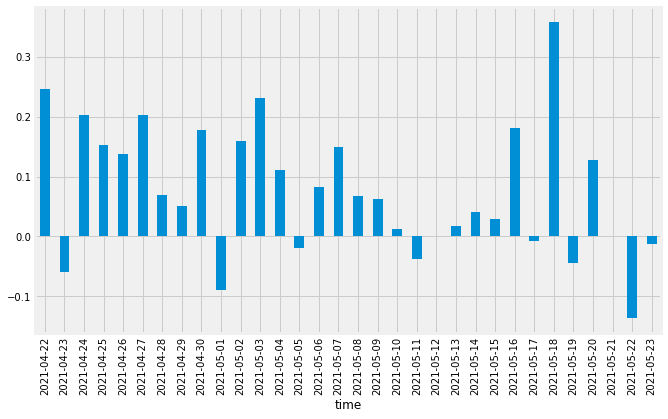

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = df_ethereum_headlines.groupby(['time']).mean()
# Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.xs('compound', axis='columns')
# Plot a bar chart with pandas
mean_c.plot.bar(figsize = (10,6));

In [10]:
#Check if there are any headline duplicates
num_news_before = df_ethereum_headlines.headlines.count()
print(num_news_before)
#Drop any duplicates
df_ethereum_headlines_clean = df_ethereum_headlines.drop_duplicates(subset=['headlines'])
#Check if there are any remaining duplicates 
num_news_after = df_ethereum_headlines_clean.headlines.count()
print(num_news_after)


285
285


In [11]:
#list of all the dates that is in df_ethereum_headlines
headlines_list = df_ethereum_headlines.time.unique().tolist()

#All headlines for specified date
grouped_headlines = []
for i in range(len(headlines_list)):
    grouped_headlines.append(' '.join( str(x) for x in df_ethereum_headlines.loc[df_ethereum_headlines.time == headlines_list[i]].headlines))

In [12]:
#Show aggregated news text
grouped_headlines[0]

'Here’s What Could Be Next for Bitcoin, Ethereum, and Two Low-Cap Altcoins, According to Top Trader How Leveraged Positions Could Have Accelerated Ethereum’s Slump Confirmed: Ethereum’s Berlin hard fork solved a flaw that exposed the network to attacks These 3 factors will determine if Ethereum’s recovery will be sustainable Bitcoin & Ethereum: Here’s the reality check on their price trajectories Crypto Market Tanks 14% to 3-Month Low Under $1.35 Trillion, Ethereum (ETH) Under $2000 Goldman Sachs: Ethereum (ETH) Might Overtake Bitcoin (BTC) As A Store of Value'

In [13]:
#Create dataframe for the group headlines 
grouped_headlines_df = pd.DataFrame(data={'date':headlines_list, 'headlines':grouped_headlines})
grouped_headlines_df.head()

,date,headlines
0,2021-05-23,"Here’s What Could Be Next for Bitcoin, Ethereu..."
1,2021-05-22,Why did Bitcoin and Ethereum’s price drop so q...
2,2021-05-21,British MP says Ethereum ‘flippening’ is takin...
3,2021-05-20,"Bank of Canada: Intrinsic Value of Bitcoin, Et..."
4,2021-05-19,How Justin Sun Almost Caused Ethereum To Drop ...


In [44]:
# Load data
historical_data = pd.read_csv('historical_data.csv')

In [51]:
# Convert the date column from string to datetime
historical_data.date = pd.to_datetime(historical_data.date).dt.date

# Drop first column
historical_data = historical_data.drop('Unnamed: 0', axis=1)

historical_data

,date,open,high,low,close,volume,market_cap
0,2021-05-29,"$2,414.07","$2,566.94","$2,208.49","$2,279.51","$33,773,720,220","$264,600,384,052"
1,2021-05-28,"$2,742.47","$2,761.36","$2,336.36","$2,419.91","$39,999,114,805","$280,864,129,343"
2,2021-05-27,"$2,888.75","$2,888.75","$2,642.61","$2,736.49","$33,373,635,283","$317,571,010,585"
3,2021-05-26,"$2,707.05","$2,911.74","$2,652.09","$2,888.70","$42,499,766,020","$335,196,485,646"
4,2021-05-25,"$2,649.03","$2,750.53","$2,394.36","$2,706.63","$49,558,333,256","$314,033,309,034"
...,...,...,...,...,...,...,...
56,2021-04-03,"$2,142.90","$2,144.96","$2,028.42","$2,028.42","$32,011,518,871","$233,921,770,622"
57,2021-04-02,"$1,976.93","$2,152.45","$1,960.68","$2,143.23","$34,862,511,022","$247,132,282,844"
58,2021-04-01,"$1,919.16","$1,989.06","$1,912.18","$1,977.28","$30,914,259,795","$227,970,125,751"
59,2021-03-31,"$1,846.10","$1,947.84","$1,793.00","$1,918.36","$30,226,902,621","$221,151,811,159"


In [69]:
#Create a label column
historical_data['label'] = 'label'
historical_data

,date,open,high,low,close,volume,market_cap,label
0,2021-05-29,"$2,414.07","$2,566.94","$2,208.49","$2,279.51","$33,773,720,220","$264,600,384,052",label
1,2021-05-28,"$2,742.47","$2,761.36","$2,336.36","$2,419.91","$39,999,114,805","$280,864,129,343",label
2,2021-05-27,"$2,888.75","$2,888.75","$2,642.61","$2,736.49","$33,373,635,283","$317,571,010,585",label
3,2021-05-26,"$2,707.05","$2,911.74","$2,652.09","$2,888.70","$42,499,766,020","$335,196,485,646",label
4,2021-05-25,"$2,649.03","$2,750.53","$2,394.36","$2,706.63","$49,558,333,256","$314,033,309,034",label
...,...,...,...,...,...,...,...,...
56,2021-04-03,"$2,142.90","$2,144.96","$2,028.42","$2,028.42","$32,011,518,871","$233,921,770,622",label
57,2021-04-02,"$1,976.93","$2,152.45","$1,960.68","$2,143.23","$34,862,511,022","$247,132,282,844",label
58,2021-04-01,"$1,919.16","$1,989.06","$1,912.18","$1,977.28","$30,914,259,795","$227,970,125,751",label
59,2021-03-31,"$1,846.10","$1,947.84","$1,793.00","$1,918.36","$30,226,902,621","$221,151,811,159",label


In [73]:
for i in range(0,(len(historical_data)-1)):
    if historical_data['close'][i] > historical_data['close'][i+1]:
        historical_data['label'][i] = 1 # The market closed higher than the day before
    elif historical_data['close'][i] < historical_data['close'][i+1]:
        historical_data['label'][i] = 0 # The market closed lower than the day before
    else:
        historical_data['label'][i] = 2 # market stay the same 

In [74]:
# Show data
historical_data

,date,open,high,low,close,volume,market_cap,label
0,2021-05-29,"$2,414.07","$2,566.94","$2,208.49","$2,279.51","$33,773,720,220","$264,600,384,052",0
1,2021-05-28,"$2,742.47","$2,761.36","$2,336.36","$2,419.91","$39,999,114,805","$280,864,129,343",0
2,2021-05-27,"$2,888.75","$2,888.75","$2,642.61","$2,736.49","$33,373,635,283","$317,571,010,585",0
3,2021-05-26,"$2,707.05","$2,911.74","$2,652.09","$2,888.70","$42,499,766,020","$335,196,485,646",1
4,2021-05-25,"$2,649.03","$2,750.53","$2,394.36","$2,706.63","$49,558,333,256","$314,033,309,034",1
...,...,...,...,...,...,...,...,...
56,2021-04-03,"$2,142.90","$2,144.96","$2,028.42","$2,028.42","$32,011,518,871","$233,921,770,622",0
57,2021-04-02,"$1,976.93","$2,152.45","$1,960.68","$2,143.23","$34,862,511,022","$247,132,282,844",1
58,2021-04-01,"$1,919.16","$1,989.06","$1,912.18","$1,977.28","$30,914,259,795","$227,970,125,751",1
59,2021-03-31,"$1,846.10","$1,947.84","$1,793.00","$1,918.36","$30,226,902,621","$221,151,811,159",1


In [288]:
for i in range(0,(len(historical_data)-1)):
    historical_data['open_prev'][i] = historical_data['open'][i+1]
    historical_data['high_prev'][i] = historical_data['high'][i+1]
    historical_data['low_prev'][i] = historical_data['low'][i+1]
    historical_data['volume_prev'][i] = historical_data['volume'][i+1]

historical_data.head()

,date,open,high,low,close,volume,market_cap,label,open_prev,high_prev,low_prev,volume_prev
0,2021-05-29,"$2,414.07","$2,566.94","$2,208.49","$2,279.51","$33,773,720,220","$264,600,384,052",0,"$2,742.47","$2,761.36","$2,336.36","$39,999,114,805"
1,2021-05-28,"$2,742.47","$2,761.36","$2,336.36","$2,419.91","$39,999,114,805","$280,864,129,343",0,"$2,888.75","$2,888.75","$2,642.61","$33,373,635,283"
2,2021-05-27,"$2,888.75","$2,888.75","$2,642.61","$2,736.49","$33,373,635,283","$317,571,010,585",0,"$2,707.05","$2,911.74","$2,652.09","$42,499,766,020"
3,2021-05-26,"$2,707.05","$2,911.74","$2,652.09","$2,888.70","$42,499,766,020","$335,196,485,646",1,"$2,649.03","$2,750.53","$2,394.36","$49,558,333,256"
4,2021-05-25,"$2,649.03","$2,750.53","$2,394.36","$2,706.63","$49,558,333,256","$314,033,309,034",1,"$2,099.94","$2,672.60","$2,090.64","$53,697,121,740"


In [289]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         61 non-null     object
 1   open         61 non-null     object
 2   high         61 non-null     object
 3   low          61 non-null     object
 4   close        61 non-null     object
 5   volume       61 non-null     object
 6   market_cap   61 non-null     object
 7   label        61 non-null     object
 8   open_prev    61 non-null     object
 9   high_prev    61 non-null     object
 10  low_prev     61 non-null     object
 11  volume_prev  61 non-null     object
dtypes: object(12)
memory usage: 5.8+ KB


In [290]:
df_merge = pd.merge(historical_data, grouped_headlines_df)
df_merge

,date,open,high,low,close,volume,market_cap,label,open_prev,high_prev,low_prev,volume_prev,headlines
0,2021-05-23,"$2,298.37","$2,384.41","$1,737.47","$2,109.58","$56,005,721,977","$244,704,904,961",0,"$2,436.01","$2,483.98","$2,168.12","$42,089,937,660","Here’s What Could Be Next for Bitcoin, Ethereu..."
1,2021-05-22,"$2,436.01","$2,483.98","$2,168.12","$2,295.71","$42,089,937,660","$266,263,966,984",0,"$2,772.34","$2,938.21","$2,113.35","$53,774,070,802",Why did Bitcoin and Ethereum’s price drop so q...
2,2021-05-21,"$2,772.34","$2,938.21","$2,113.35","$2,430.62","$53,774,070,802","$281,879,243,639",0,"$2,439.64","$2,993.15","$2,170.23","$67,610,826,680",British MP says Ethereum ‘flippening’ is takin...
3,2021-05-20,"$2,439.64","$2,993.15","$2,170.23","$2,784.29","$67,610,826,680","$322,857,390,499",1,"$3,382.66","$3,437.94","$1,952.46","$84,482,912,776","Bank of Canada: Intrinsic Value of Bitcoin, Et..."
4,2021-05-19,"$3,382.66","$3,437.94","$1,952.46","$2,460.68","$84,482,912,776","$285,298,709,245",0,"$3,276.87","$3,562.47","$3,246.40","$40,416,525,218",How Justin Sun Almost Caused Ethereum To Drop ...
5,2021-05-18,"$3,276.87","$3,562.47","$3,246.40","$3,380.07","$40,416,525,218","$391,850,295,263",1,"$3,581.34","$3,587.77","$3,129.01","$54,061,732,774","Comedian Steve Harvey Selling NFT for Charity,..."
6,2021-05-17,"$3,581.34","$3,587.77","$3,129.01","$3,282.40","$54,061,732,774","$380,482,843,865",0,"$3,641.83","$3,878.90","$3,350.95","$47,359,478,734","Furniture Company Ethan Allen Trades as ETH, I..."
7,2021-05-16,"$3,641.83","$3,878.90","$3,350.95","$3,587.51","$47,359,478,734","$415,801,534,962",0,"$4,075.95","$4,129.19","$3,638.12","$42,422,321,751",BSC Daily Transaction Rate Grows to 12 Million...
8,2021-05-15,"$4,075.95","$4,129.19","$3,638.12","$3,638.12","$42,422,321,751","$421,619,090,683",0,"$3,720.12","$4,171.02","$3,703.40","$48,174,271,215",Here’s why it makes sense to ‘load up on Ether...
9,2021-05-14,"$3,720.12","$4,171.02","$3,703.40","$4,079.06","$48,174,271,215","$472,663,570,788",1,"$3,828.92","$4,032.56","$3,549.41","$78,398,214,539",Analyst Names Top Crypto Assets Beyond Ethereu...


In [25]:
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a fuction to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [291]:
# Create two columns
# Subjectivity
df_merge['Subjectivity'] = df_merge['headlines'].apply(getSubjectivity)
# Polarity
df_merge['Polarity'] = df_merge['headlines'].apply(getPolarity)

In [292]:
# Show Columns
df_merge.head()

,date,open,high,low,close,volume,market_cap,label,open_prev,high_prev,low_prev,volume_prev,headlines,Subjectivity,Polarity
0,2021-05-23,"$2,298.37","$2,384.41","$1,737.47","$2,109.58","$56,005,721,977","$244,704,904,961",0,"$2,436.01","$2,483.98","$2,168.12","$42,089,937,660","Here’s What Could Be Next for Bitcoin, Ethereu...",0.468333,0.121667
1,2021-05-22,"$2,436.01","$2,483.98","$2,168.12","$2,295.71","$42,089,937,660","$266,263,966,984",0,"$2,772.34","$2,938.21","$2,113.35","$53,774,070,802",Why did Bitcoin and Ethereum’s price drop so q...,0.350000,0.266667
2,2021-05-21,"$2,772.34","$2,938.21","$2,113.35","$2,430.62","$53,774,070,802","$281,879,243,639",0,"$2,439.64","$2,993.15","$2,170.23","$67,610,826,680",British MP says Ethereum ‘flippening’ is takin...,0.356548,0.119940
3,2021-05-20,"$2,439.64","$2,993.15","$2,170.23","$2,784.29","$67,610,826,680","$322,857,390,499",1,"$3,382.66","$3,437.94","$1,952.46","$84,482,912,776","Bank of Canada: Intrinsic Value of Bitcoin, Et...",0.294111,-0.057444
4,2021-05-19,"$3,382.66","$3,437.94","$1,952.46","$2,460.68","$84,482,912,776","$285,298,709,245",0,"$3,276.87","$3,562.47","$3,246.40","$40,416,525,218",How Justin Sun Almost Caused Ethereum To Drop ...,0.250000,-0.316667


In [32]:
# Create a function to get the sentiment scores 
def getSent(text):
    sent = SentimentIntensityAnalyzer()
    sentiment = sent.polarity_scores(text)
    return sentiment

In [293]:
# Get the sentiment scores for each day
compound = []
pos = []
neg = []
neu = []
SENT =0

for i in range(0, len(df_merge)):
    SENT = getSent(df_merge['headlines'][i])
    compound.append(SENT['compound'])
    pos.append(SENT['pos'])
    neg.append(SENT['neg'])
    neu.append(SENT['neu'])


In [294]:
#Store the sentiment data onto dataframe
df_merge['Compund']= compound
df_merge['pos'] = pos
df_merge['neg'] = neg
df_merge['neu'] = neu
# Show dataframe
df_merge.head()

,date,open,high,low,close,volume,market_cap,label,open_prev,high_prev,low_prev,volume_prev,headlines,Subjectivity,Polarity,Compund,pos,neg,neu
0,2021-05-23,"$2,298.37","$2,384.41","$1,737.47","$2,109.58","$56,005,721,977","$244,704,904,961",0,"$2,436.01","$2,483.98","$2,168.12","$42,089,937,660","Here’s What Could Be Next for Bitcoin, Ethereu...",0.468333,0.121667,-0.1027,0.067,0.082,0.851
1,2021-05-22,"$2,436.01","$2,483.98","$2,168.12","$2,295.71","$42,089,937,660","$266,263,966,984",0,"$2,772.34","$2,938.21","$2,113.35","$53,774,070,802",Why did Bitcoin and Ethereum’s price drop so q...,0.350000,0.266667,-0.2732,0.000,0.100,0.900
2,2021-05-21,"$2,772.34","$2,938.21","$2,113.35","$2,430.62","$53,774,070,802","$281,879,243,639",0,"$2,439.64","$2,993.15","$2,170.23","$67,610,826,680",British MP says Ethereum ‘flippening’ is takin...,0.356548,0.119940,-0.1663,0.040,0.046,0.913
3,2021-05-20,"$2,439.64","$2,993.15","$2,170.23","$2,784.29","$67,610,826,680","$322,857,390,499",1,"$3,382.66","$3,437.94","$1,952.46","$84,482,912,776","Bank of Canada: Intrinsic Value of Bitcoin, Et...",0.294111,-0.057444,0.6921,0.119,0.049,0.832
4,2021-05-19,"$3,382.66","$3,437.94","$1,952.46","$2,460.68","$84,482,912,776","$285,298,709,245",0,"$3,276.87","$3,562.47","$3,246.40","$40,416,525,218",How Justin Sun Almost Caused Ethereum To Drop ...,0.250000,-0.316667,0.5423,0.088,0.057,0.855


In [295]:
# Create a list of columns to keep 
columns = ['open_prev', 'high_prev', 'low_prev', 'volume_prev', 'Subjectivity', 'Polarity', 'Compund', 'pos', 'neg', 'neu', 'label']
df = df_merge[columns]
df

,open_prev,high_prev,low_prev,volume_prev,Subjectivity,Polarity,Compund,pos,neg,neu,label
0,"$2,436.01","$2,483.98","$2,168.12","$42,089,937,660",0.468333,0.121667,-0.1027,0.067,0.082,0.851,0
1,"$2,772.34","$2,938.21","$2,113.35","$53,774,070,802",0.350000,0.266667,-0.2732,0.000,0.100,0.900,0
2,"$2,439.64","$2,993.15","$2,170.23","$67,610,826,680",0.356548,0.119940,-0.1663,0.040,0.046,0.913,0
3,"$3,382.66","$3,437.94","$1,952.46","$84,482,912,776",0.294111,-0.057444,0.6921,0.119,0.049,0.832,1
4,"$3,276.87","$3,562.47","$3,246.40","$40,416,525,218",0.250000,-0.316667,0.5423,0.088,0.057,0.855,0
5,"$3,581.34","$3,587.77","$3,129.01","$54,061,732,774",0.463573,0.263447,0.9808,0.243,0.000,0.757,1
6,"$3,641.83","$3,878.90","$3,350.95","$47,359,478,734",0.600000,0.112500,0.1901,0.041,0.044,0.915,0
7,"$4,075.95","$4,129.19","$3,638.12","$42,422,321,751",0.000000,0.000000,0.3612,0.102,0.000,0.898,0
8,"$3,720.12","$4,171.02","$3,703.40","$48,174,271,215",0.666667,0.333333,0.1372,0.059,0.051,0.890,0
9,"$3,828.92","$4,032.56","$3,549.41","$78,398,214,539",0.477083,0.106629,0.1489,0.094,0.061,0.845,1


In [296]:
# Need to remove all the $ from the dataframe

df_clean = df.replace({'\$':''}, regex = True).replace({'\,':''}, regex = True)
df_clean 

,open_prev,high_prev,low_prev,volume_prev,Subjectivity,Polarity,Compund,pos,neg,neu,label
0,2436.01,2483.98,2168.12,42089937660,0.468333,0.121667,-0.1027,0.067,0.082,0.851,0
1,2772.34,2938.21,2113.35,53774070802,0.350000,0.266667,-0.2732,0.000,0.100,0.900,0
2,2439.64,2993.15,2170.23,67610826680,0.356548,0.119940,-0.1663,0.040,0.046,0.913,0
3,3382.66,3437.94,1952.46,84482912776,0.294111,-0.057444,0.6921,0.119,0.049,0.832,1
4,3276.87,3562.47,3246.40,40416525218,0.250000,-0.316667,0.5423,0.088,0.057,0.855,0
5,3581.34,3587.77,3129.01,54061732774,0.463573,0.263447,0.9808,0.243,0.000,0.757,1
6,3641.83,3878.90,3350.95,47359478734,0.600000,0.112500,0.1901,0.041,0.044,0.915,0
7,4075.95,4129.19,3638.12,42422321751,0.000000,0.000000,0.3612,0.102,0.000,0.898,0
8,3720.12,4171.02,3703.40,48174271215,0.666667,0.333333,0.1372,0.059,0.051,0.890,0
9,3828.92,4032.56,3549.41,78398214539,0.477083,0.106629,0.1489,0.094,0.061,0.845,1


In [297]:
#Create the feature data set
X = df_clean
X = np.array(X.drop(['label'], 1))
# Target dataset
y = np.array(df_clean['label'])

In [298]:
# Split the data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [299]:
#Create and train the model
#Instatiate
LDA = LinearDiscriminantAnalysis()
model = LDA.fit(x_train, y_train)

In [300]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.60      1.00      0.75         3

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



In [301]:
df_merge.head()

,date,open,high,low,close,volume,market_cap,label,open_prev,high_prev,low_prev,volume_prev,headlines,Subjectivity,Polarity,Compund,pos,neg,neu
0,2021-05-23,"$2,298.37","$2,384.41","$1,737.47","$2,109.58","$56,005,721,977","$244,704,904,961",0,"$2,436.01","$2,483.98","$2,168.12","$42,089,937,660","Here’s What Could Be Next for Bitcoin, Ethereu...",0.468333,0.121667,-0.1027,0.067,0.082,0.851
1,2021-05-22,"$2,436.01","$2,483.98","$2,168.12","$2,295.71","$42,089,937,660","$266,263,966,984",0,"$2,772.34","$2,938.21","$2,113.35","$53,774,070,802",Why did Bitcoin and Ethereum’s price drop so q...,0.350000,0.266667,-0.2732,0.000,0.100,0.900
2,2021-05-21,"$2,772.34","$2,938.21","$2,113.35","$2,430.62","$53,774,070,802","$281,879,243,639",0,"$2,439.64","$2,993.15","$2,170.23","$67,610,826,680",British MP says Ethereum ‘flippening’ is takin...,0.356548,0.119940,-0.1663,0.040,0.046,0.913
3,2021-05-20,"$2,439.64","$2,993.15","$2,170.23","$2,784.29","$67,610,826,680","$322,857,390,499",1,"$3,382.66","$3,437.94","$1,952.46","$84,482,912,776","Bank of Canada: Intrinsic Value of Bitcoin, Et...",0.294111,-0.057444,0.6921,0.119,0.049,0.832
4,2021-05-19,"$3,382.66","$3,437.94","$1,952.46","$2,460.68","$84,482,912,776","$285,298,709,245",0,"$3,276.87","$3,562.47","$3,246.40","$40,416,525,218",How Justin Sun Almost Caused Ethereum To Drop ...,0.250000,-0.316667,0.5423,0.088,0.057,0.855


## Create a pipeline
1. Remove punctuation

2. Tokenization

3. Remove stopwords

4. Lemmatize/Stem

In [134]:
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [113]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [118]:
def clean_headlines(headline):
    headline = "".join([word for word in headline if word not in string.punctuation])
    tokens = re.split('\W+', headline)
    headline = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return headline

df_merge['headline_clean'] = df_merge['headlines'].apply(lambda x: clean_headlines(x.lower()))

In [119]:
df_merge.head()

,date,open,high,low,close,volume,market_cap,label,headlines,Subjectivity,Polarity,Compund,pos,neg,neu,headline_clean
0,2021-05-23,"$2,298.37","$2,384.41","$1,737.47","$2,109.58","$56,005,721,977","$244,704,904,961",0,"Here’s What Could Be Next for Bitcoin, Ethereu...",0.468333,0.121667,-0.1027,0.067,0.082,0.851,"[could, next, bitcoin, ethereum, two, lowcap, ..."
1,2021-05-22,"$2,436.01","$2,483.98","$2,168.12","$2,295.71","$42,089,937,660","$266,263,966,984",0,Why did Bitcoin and Ethereum’s price drop so q...,0.350000,0.266667,-0.2732,0.000,0.100,0.900,"[bitcoin, ethereum, price, drop, quickly, ethe..."
2,2021-05-21,"$2,772.34","$2,938.21","$2,113.35","$2,430.62","$53,774,070,802","$281,879,243,639",0,British MP says Ethereum ‘flippening’ is takin...,0.356548,0.119940,-0.1663,0.040,0.046,0.913,"[british, mp, say, ethereum, flippening, takin..."
3,2021-05-20,"$2,439.64","$2,993.15","$2,170.23","$2,784.29","$67,610,826,680","$322,857,390,499",1,"Bank of Canada: Intrinsic Value of Bitcoin, Et...",0.294111,-0.057444,0.6921,0.119,0.049,0.832,"[bank, canada, intrinsic, value, bitcoin, ethe..."
4,2021-05-19,"$3,382.66","$3,437.94","$1,952.46","$2,460.68","$84,482,912,776","$285,298,709,245",0,How Justin Sun Almost Caused Ethereum To Drop ...,0.250000,-0.316667,0.5423,0.088,0.057,0.855,"[justin, sun, almost, caused, ethereum, drop, ..."


In [121]:
df_increase = df_merge.loc[df_merge['label'] == 1 ]
df_increase.head()

,date,open,high,low,close,volume,market_cap,label,headlines,Subjectivity,Polarity,Compund,pos,neg,neu,headline_clean
3,2021-05-20,"$2,439.64","$2,993.15","$2,170.23","$2,784.29","$67,610,826,680","$322,857,390,499",1,"Bank of Canada: Intrinsic Value of Bitcoin, Et...",0.294111,-0.057444,0.6921,0.119,0.049,0.832,"[bank, canada, intrinsic, value, bitcoin, ethe..."
5,2021-05-18,"$3,276.87","$3,562.47","$3,246.40","$3,380.07","$40,416,525,218","$391,850,295,263",1,"Comedian Steve Harvey Selling NFT for Charity,...",0.463573,0.263447,0.9808,0.243,0.000,0.757,"[comedian, steve, harvey, selling, nft, charit..."
9,2021-05-14,"$3,720.12","$4,171.02","$3,703.40","$4,079.06","$48,174,271,215","$472,663,570,788",1,Analyst Names Top Crypto Assets Beyond Ethereu...,0.477083,0.106629,0.1489,0.094,0.061,0.845,"[analyst, name, top, crypto, asset, beyond, et..."
12,2021-05-11,"$3,948.27","$4,178.21","$3,783.89","$4,168.70","$52,679,737,865","$482,881,900,491",1,The Bearish Signal Ethereum Bulls Need To Fear...,0.363704,0.123333,-0.3947,0.020,0.043,0.936,"[bearish, signal, ethereum, bull, need, fear, ..."
13,2021-05-10,"$3,924.41","$4,197.47","$3,684.45","$3,952.29","$62,691,789,007","$457,761,219,807",1,Ethereum Price Prediction: ‘Major Upgrades’ Co...,0.393056,-0.086458,-0.1154,0.051,0.048,0.901,"[ethereum, price, prediction, major, upgrade, ..."


In [122]:
df_decrease = df_merge.loc[df_merge['label'] == 0 ]
df_decrease.head()

,date,open,high,low,close,volume,market_cap,label,headlines,Subjectivity,Polarity,Compund,pos,neg,neu,headline_clean
0,2021-05-23,"$2,298.37","$2,384.41","$1,737.47","$2,109.58","$56,005,721,977","$244,704,904,961",0,"Here’s What Could Be Next for Bitcoin, Ethereu...",0.468333,0.121667,-0.1027,0.067,0.082,0.851,"[could, next, bitcoin, ethereum, two, lowcap, ..."
1,2021-05-22,"$2,436.01","$2,483.98","$2,168.12","$2,295.71","$42,089,937,660","$266,263,966,984",0,Why did Bitcoin and Ethereum’s price drop so q...,0.350000,0.266667,-0.2732,0.000,0.100,0.900,"[bitcoin, ethereum, price, drop, quickly, ethe..."
2,2021-05-21,"$2,772.34","$2,938.21","$2,113.35","$2,430.62","$53,774,070,802","$281,879,243,639",0,British MP says Ethereum ‘flippening’ is takin...,0.356548,0.119940,-0.1663,0.040,0.046,0.913,"[british, mp, say, ethereum, flippening, takin..."
4,2021-05-19,"$3,382.66","$3,437.94","$1,952.46","$2,460.68","$84,482,912,776","$285,298,709,245",0,How Justin Sun Almost Caused Ethereum To Drop ...,0.250000,-0.316667,0.5423,0.088,0.057,0.855,"[justin, sun, almost, caused, ethereum, drop, ..."
6,2021-05-17,"$3,581.34","$3,587.77","$3,129.01","$3,282.40","$54,061,732,774","$380,482,843,865",0,"Furniture Company Ethan Allen Trades as ETH, I...",0.600000,0.112500,0.1901,0.041,0.044,0.915,"[furniture, company, ethan, allen, trade, eth,..."


In [123]:
# Most/Least frequent words 
increase_list = [] # list containing all words that are involved with market to close higher then previous day
for x in df_increase['headline_clean']: # loop over list in df 
    increase_list += x # append elements of lists to full list 
    
increase_val_counts = pd.Series(increase_list).value_counts()
increase_val_counts

ethereum    167
bitcoin      45
eth          17
crypto       16
could        15
           ... 
supply        1
cause         1
king          1
wine          1
cowen         1
Length: 720, dtype: int64

In [147]:
increase_val_counts[-20:]

morning             1
dunkaroos           1
receives            1
another             1
17month             1
druckenmiller       1
150000              1
3x                  1
wall                1
locked              1
physicallybacked    1
hitting             1
close               1
boosting            1
rising              1
supply              1
cause               1
king                1
wine                1
cowen               1
dtype: int64

In [124]:
# Most/Least frequent words 
decrease_list = [] # list containing all words that are involved with market to close low then previous day
for x in df_decrease['headline_clean']: # loop over list in df 
    decrease_list += x # append elements of lists to full list 
    
decrease_val_counts = pd.Series(decrease_list).value_counts()
decrease_val_counts

ethereum                 114
bitcoin                   39
crypto                    27
price                     12
eth                       12
                        ... 
candle                     1
4k                         1
solved                     1
insightscryptocompare      1
cowen                      1
Length: 532, dtype: int64

In [127]:
from textblob import TextBlob, Word
from wordcloud import WordCloud

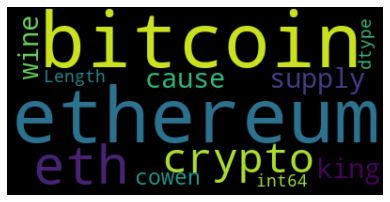

<Figure size 1440x720 with 0 Axes>

In [128]:
wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(increase_val_counts))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

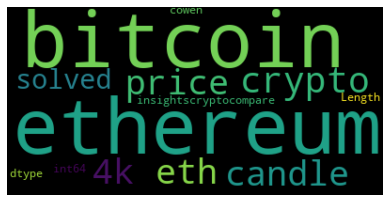

<Figure size 1440x720 with 0 Axes>

In [129]:
wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(decrease_val_counts))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

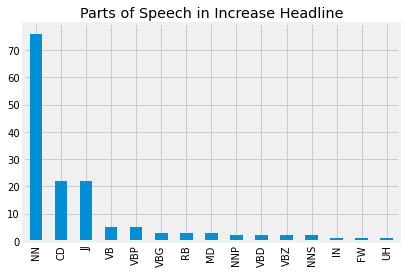

In [136]:
blob = TextBlob(str(df_increase['headline_clean']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', title="Parts of Speech in Increase Headline")

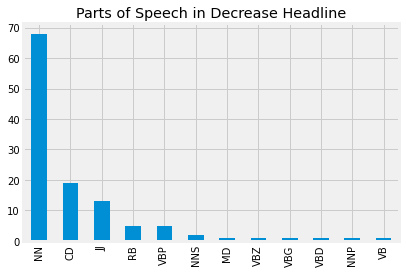

In [137]:
blob = TextBlob(str(df_decrease['headline_clean']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', title="Parts of Speech in Decrease Headline")

In [138]:
(pd.Series(nltk.ngrams(increase_list, 2)).value_counts())[:20]

(bitcoin, ethereum)       20
(ta, ethereum)            11
(ethereum, blockchain)     5
(alltime, high)            5
(ethereum, 20)             4
(european, investment)     4
(eth, price)               4
(buy, ethereum)            4
(bond, ethereum)           4
(eth, could)               4
(investment, bank)         4
(ethereum, price)          4
(reason, ethereum)         3
(ethereum, rally)          3
(elon, musk)               3
(ethereum, new)            3
(new, ath)                 3
(cardano, ethereum)        3
(mark, cuban)              3
(ethereum, surge)          3
dtype: int64

In [139]:
(pd.Series(nltk.ngrams(decrease_list, 2)).value_counts())[:20]

(bitcoin, ethereum)    23
(ta, ethereum)          6
(ethereum, price)       5
(ethereum, etf)         5
(ethereum, eth)         4
(vaneck, file)          4
(sp, dow)               4
(dow, jones)            4
(file, ethereum)        4
(vitalik, buterin)      4
(mark, cuban)           4
(crypto, market)        3
(ethereum, index)       3
(ethereum, crypto)      3
(index, debut)          3
(day, ethereum)         3
(ethereum, classic)     3
(inu, shib)             2
(ethereum, xrp)         2
(new, ath)              2
dtype: int64

# Model Baseline: 
- Model 1: 1 lag Historical Data
- Model 2: 1 lag Historical data + RSI data
- Model 3: Sentiment Analysis

In [35]:
df_ethereum_headlines['date'] = df_ethereum_headlines['time']

In [36]:
df_ethereum_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headlines    285 non-null    object 
 1   news_center  285 non-null    object 
 2   time         285 non-null    object 
 3   website      285 non-null    object 
 4   neg          285 non-null    float64
 5   neu          285 non-null    float64
 6   pos          285 non-null    float64
 7   compound     285 non-null    float64
 8   date         285 non-null    object 
 9   Comp         285 non-null    float64
 10  positive     285 non-null    float64
 11  negative     285 non-null    float64
 12  neutural     285 non-null    float64
dtypes: float64(8), object(5)
memory usage: 29.1+ KB


In [37]:
# Get the sentiment scores for each day
compound = []
pos = []
neg = []
neu = []
SENT =0

for i in range(0, len(df_ethereum_headlines)):
    SENT = getSent(df_ethereum_headlines['headlines'][i])
    compound.append(SENT['compound'])
    pos.append(SENT['pos'])
    neg.append(SENT['neg'])
    neu.append(SENT['neu'])


In [38]:
#Store the sentiment data onto dataframe
df_ethereum_headlines['Comp']= compound
df_ethereum_headlines['positive'] = pos
df_ethereum_headlines['negative'] = neg
df_ethereum_headlines['neutural'] = neu
# Show dataframe
df_ethereum_headlines.head()

,headlines,news_center,time,website,neg,neu,pos,compound,date,Comp,positive,negative,neutural
0,"Here’s What Could Be Next for Bitcoin, Ethereu...",The Daily Hodl,2021-05-23,https://dailyhodl.com/2021/05/23/heres-what-co...,0.000,0.893,0.107,0.2023,2021-05-23,0.2023,0.107,0.000,0.893
1,How Leveraged Positions Could Have Accelerated...,Bitcoinist.com,2021-05-23,https://coinmarketcap.com/headlines/news/how-l...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,0.000,0.000,1.000
2,Confirmed: Ethereum’s Berlin hard fork solved ...,Finbold,2021-05-23,https://finbold.com/confirmed-ethereums-berlin...,0.335,0.539,0.126,-0.3612,2021-05-23,-0.3612,0.126,0.335,0.539
3,These 3 factors will determine if Ethereum’s r...,AMBCrypto,2021-05-23,https://ambcrypto.com/these-3-factors-will-det...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,0.000,0.000,1.000
4,Bitcoin & Ethereum: Here’s the reality check o...,AMBCrypto,2021-05-23,https://ambcrypto.com/bitcoin-ethereum-heres-t...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,0.000,0.000,1.000


In [39]:
# Load data
df_historical_data = pd.read_csv('df_historical_data.csv')
# Show data
df_historical_data.head()

,Unnamed: 0,date,open,high,low,close,volume,market_cap,RSI,delta,...,bought_sold,open_class,high_class,low_class,close_class,volume_class,open_prev,high_prev,low_prev,volume_prev
0,0,2021-06-02,2634.46,2801.39,2555.40,2706.12,27723267359,314266256163,54.123517,72.60,...,0,0,1,1,1,1,2707.56,2739.74,2531.16,27363223090
1,1,2021-06-01,2707.56,2739.74,2531.16,2633.52,27363223090,305798597367,40.235790,-81.43,...,0,1,1,1,0,0,2387.20,2715.86,2279.51,31007383150
2,2,2021-05-31,2387.20,2715.86,2279.51,2714.95,31007383150,315217277483,42.609654,324.64,...,0,1,1,1,1,1,2278.29,2472.19,2188.83,25876619428
3,3,2021-05-30,2278.29,2472.19,2188.83,2390.31,25876619428,277492990927,34.328202,110.80,...,0,0,0,0,1,0,2414.07,2566.94,2208.49,33773720220
4,4,2021-05-29,2414.07,2566.94,2208.49,2279.51,33773720220,264600384052,31.930542,-140.40,...,0,0,0,0,0,0,2742.47,2761.36,2336.36,39999114805


In [40]:
# Convert the date column from string to datetime
df_historical_data.date = pd.to_datetime(df_historical_data.date).dt.date

# Drop first column
df_historical_data = df_historical_data.drop('Unnamed: 0', axis=1)

df_historical_data.head()

,date,open,high,low,close,volume,market_cap,RSI,delta,sell_points,...,bought_sold,open_class,high_class,low_class,close_class,volume_class,open_prev,high_prev,low_prev,volume_prev
0,2021-06-02,2634.46,2801.39,2555.40,2706.12,27723267359,314266256163,54.123517,72.60,0,...,0,0,1,1,1,1,2707.56,2739.74,2531.16,27363223090
1,2021-06-01,2707.56,2739.74,2531.16,2633.52,27363223090,305798597367,40.235790,-81.43,0,...,0,1,1,1,0,0,2387.20,2715.86,2279.51,31007383150
2,2021-05-31,2387.20,2715.86,2279.51,2714.95,31007383150,315217277483,42.609654,324.64,0,...,0,1,1,1,1,1,2278.29,2472.19,2188.83,25876619428
3,2021-05-30,2278.29,2472.19,2188.83,2390.31,25876619428,277492990927,34.328202,110.80,0,...,0,0,0,0,1,0,2414.07,2566.94,2208.49,33773720220
4,2021-05-29,2414.07,2566.94,2208.49,2279.51,33773720220,264600384052,31.930542,-140.40,0,...,0,0,0,0,0,0,2742.47,2761.36,2336.36,39999114805


In [52]:
df_historical_data['label'] = 'label'

for i in range(0,(len(df_historical_data)-1)):
    if df_historical_data['close'][i] > df_historical_data['close'][i+1]:
        df_historical_data['label'][i] = 1 # The market closed higher than the day before
    elif df_historical_data['close'][i] < df_historical_data['close'][i+1]:
        df_historical_data['label'][i] = 0 # The market closed lower than the day before
    else:
        df_historical_data['label'][i] = 2 # market stay the same 

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [53]:
hd = df_historical_data.set_index(pd.to_datetime(df_historical_data['date']))
hd

,date,open,high,low,close,volume,market_cap,RSI,delta,sell_points,...,open_class,high_class,low_class,close_class,volume_class,open_prev,high_prev,low_prev,volume_prev,label
date,,,,,,,,,,,,,,,,,,,,,
2021-06-02,2021-06-02,2634.46,2801.39,2555.40,2706.12,27723267359,314266256163,54.123517,72.60,0,...,0,1,1,1,1,2707.56,2739.74,2531.16,27363223090,1
2021-06-01,2021-06-01,2707.56,2739.74,2531.16,2633.52,27363223090,305798597367,40.235790,-81.43,0,...,1,1,1,0,0,2387.20,2715.86,2279.51,31007383150,0
2021-05-31,2021-05-31,2387.20,2715.86,2279.51,2714.95,31007383150,315217277483,42.609654,324.64,0,...,1,1,1,1,1,2278.29,2472.19,2188.83,25876619428,1
2021-05-30,2021-05-30,2278.29,2472.19,2188.83,2390.31,25876619428,277492990927,34.328202,110.80,0,...,0,0,0,1,0,2414.07,2566.94,2208.49,33773720220,1
2021-05-29,2021-05-29,2414.07,2566.94,2208.49,2279.51,33773720220,264600384052,31.930542,-140.40,0,...,0,0,0,0,0,2742.47,2761.36,2336.36,39999114805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,2020-06-24,244.19,248.51,232.81,235.77,8815030025,26285822239,41.619991,-8.37,0,...,1,1,0,0,1,242.54,244.86,239.76,6624530348,0
2020-06-23,2020-06-23,242.54,244.86,239.76,244.14,6624530348,27215606543,49.396457,1.61,0,...,1,1,1,1,0,229.00,243.78,228.93,9079586552,1
2020-06-22,2020-06-22,229.00,243.78,228.93,242.53,9079586552,27032930743,47.027367,13.54,0,...,0,1,1,1,1,229.22,232.36,228.49,5600408178,1


In [54]:
df_ethereum_headlines['date'] = pd.to_datetime(df_ethereum_headlines['date'])

In [55]:
df_headlines_merge = df_ethereum_headlines.join(hd, on="date", how='left', lsuffix='_left', rsuffix='_right')
df_headlines_merge

,headlines,news_center,time,website,neg,neu,pos,compound,date_left,Comp,...,open_class,high_class,low_class,close_class,volume_class,open_prev,high_prev,low_prev,volume_prev,label
0,"Here’s What Could Be Next for Bitcoin, Ethereu...",The Daily Hodl,2021-05-23,https://dailyhodl.com/2021/05/23/heres-what-co...,0.000,0.893,0.107,0.2023,2021-05-23,0.2023,...,0,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
1,How Leveraged Positions Could Have Accelerated...,Bitcoinist.com,2021-05-23,https://coinmarketcap.com/headlines/news/how-l...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
2,Confirmed: Ethereum’s Berlin hard fork solved ...,Finbold,2021-05-23,https://finbold.com/confirmed-ethereums-berlin...,0.335,0.539,0.126,-0.3612,2021-05-23,-0.3612,...,0,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
3,These 3 factors will determine if Ethereum’s r...,AMBCrypto,2021-05-23,https://ambcrypto.com/these-3-factors-will-det...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
4,Bitcoin & Ethereum: Here’s the reality check o...,AMBCrypto,2021-05-23,https://ambcrypto.com/bitcoin-ethereum-heres-t...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Value of staked ethereum reaches $10 billion m...,Finbold,2021-04-22,https://finbold.com/value-of-staked-ethereum-r...,0.000,0.753,0.247,0.3818,2021-04-22,0.3818,...,1,1,1,1,1,2331.16,2467.20,2238.37,38899067643,1
281,Regulated Bitcoin and Ethereum funds have laun...,CryptoSlate,2021-04-22,https://cryptoslate.com/regulated-bitcoin-and-...,0.000,0.857,0.143,0.1280,2021-04-22,0.1280,...,1,1,1,1,1,2331.16,2467.20,2238.37,38899067643,1
282,Key Reasons Why Ethereum Just Hit Fresh Record...,U.Today,2021-04-22,https://u.today/key-reasons-why-ethereum-just-...,0.000,0.850,0.150,0.3182,2021-04-22,0.3182,...,1,1,1,1,1,2331.16,2467.20,2238.37,38899067643,1
283,JP Morgan is Now Hiring Ethereum and Blockchai...,Feed - Cryptopotato.Com,2021-04-22,https://cryptopotato.com/jp-morgan-is-now-hiri...,0.000,0.760,0.240,0.3680,2021-04-22,0.3680,...,1,1,1,1,1,2331.16,2467.20,2238.37,38899067643,1


In [56]:
df_headlines_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   headlines       285 non-null    object        
 1   news_center     285 non-null    object        
 2   time            285 non-null    object        
 3   website         285 non-null    object        
 4   neg             285 non-null    float64       
 5   neu             285 non-null    float64       
 6   pos             285 non-null    float64       
 7   compound        285 non-null    float64       
 8   date_left       285 non-null    datetime64[ns]
 9   Comp            285 non-null    float64       
 10  positive        285 non-null    float64       
 11  negative        285 non-null    float64       
 12  neutural        285 non-null    float64       
 13  date_right      285 non-null    object        
 14  open            285 non-null    float64       
 15  high  

In [57]:
# Create two columns
# Subjectivity
df_headlines_merge['Subjectivity'] = df_headlines_merge['headlines'].apply(getSubjectivity)
# Polarity
df_headlines_merge['Polarity'] =df_headlines_merge['headlines'].apply(getPolarity)
# Show new df
df_headlines_merge.head()

,headlines,news_center,time,website,neg,neu,pos,compound,date_left,Comp,...,low_class,close_class,volume_class,open_prev,high_prev,low_prev,volume_prev,label,Subjectivity,Polarity
0,"Here’s What Could Be Next for Bitcoin, Ethereu...",The Daily Hodl,2021-05-23,https://dailyhodl.com/2021/05/23/heres-what-co...,0.000,0.893,0.107,0.2023,2021-05-23,0.2023,...,0,0,1,2436.01,2483.98,2168.12,42089937660,0,0.250000,0.250000
1,How Leveraged Positions Could Have Accelerated...,Bitcoinist.com,2021-05-23,https://coinmarketcap.com/headlines/news/how-l...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,0,1,2436.01,2483.98,2168.12,42089937660,0,0.000000,0.000000
2,Confirmed: Ethereum’s Berlin hard fork solved ...,Finbold,2021-05-23,https://finbold.com/confirmed-ethereums-berlin...,0.335,0.539,0.126,-0.3612,2021-05-23,-0.3612,...,0,0,1,2436.01,2483.98,2168.12,42089937660,0,0.770833,0.054167
3,These 3 factors will determine if Ethereum’s r...,AMBCrypto,2021-05-23,https://ambcrypto.com/these-3-factors-will-det...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,0,1,2436.01,2483.98,2168.12,42089937660,0,0.000000,0.000000
4,Bitcoin & Ethereum: Here’s the reality check o...,AMBCrypto,2021-05-23,https://ambcrypto.com/bitcoin-ethereum-heres-t...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,0,1,2436.01,2483.98,2168.12,42089937660,0,0.000000,0.000000


In [58]:
#Check the value count for news_center
df_headlines_merge.news_center.value_counts()

Decrypt                    37
NewsBTC                    34
Cointelegraph.com News     23
The Daily Hodl             23
U.Today                    21
CryptoSlate                21
AMBCrypto                  15
Seeking Alpha              12
Bitcoinist.com             12
Blockchain News            11
Crypto Briefing            10
Coingape                   10
Feed - Cryptopotato.Com     9
The Block                   7
CryptoGlobe                 6
Finbold                     6
Forbes                      4
Crypto Daily™               4
BeInCrypto                  4
Bitcoinist                  3
CryptoBriefing              2
BTCMANAGER                  2
ZyCrypto                    2
Forkast.News                1
Trustnodes                  1
Avalanche Reddit            1
CryptoNinjas                1
Ethereum World News         1
Blockworks                  1
Quartz                      1
Name: news_center, dtype: int64

In [59]:
names = pd.unique(df_headlines_merge.news_center.ravel())
names_data = {'news_center':names, 'id':np.arange(len(names))}
names_df = pd.DataFrame(data=names_data)

In [60]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   news_center  30 non-null     object
 1   id           30 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 488.0+ bytes


In [61]:
df_headlines_merge = df_headlines_merge.join(names_df.set_index('news_center'), on="news_center", how='left', lsuffix='_left', rsuffix='_right')
df_headlines_merge

,headlines,news_center,time,website,neg,neu,pos,compound,date_left,Comp,...,close_class,volume_class,open_prev,high_prev,low_prev,volume_prev,label,Subjectivity,Polarity,id
0,"Here’s What Could Be Next for Bitcoin, Ethereu...",The Daily Hodl,2021-05-23,https://dailyhodl.com/2021/05/23/heres-what-co...,0.000,0.893,0.107,0.2023,2021-05-23,0.2023,...,0,1,2436.01,2483.98,2168.12,42089937660,0,0.250000,0.250000,0
1,How Leveraged Positions Could Have Accelerated...,Bitcoinist.com,2021-05-23,https://coinmarketcap.com/headlines/news/how-l...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,1,2436.01,2483.98,2168.12,42089937660,0,0.000000,0.000000,1
2,Confirmed: Ethereum’s Berlin hard fork solved ...,Finbold,2021-05-23,https://finbold.com/confirmed-ethereums-berlin...,0.335,0.539,0.126,-0.3612,2021-05-23,-0.3612,...,0,1,2436.01,2483.98,2168.12,42089937660,0,0.770833,0.054167,2
3,These 3 factors will determine if Ethereum’s r...,AMBCrypto,2021-05-23,https://ambcrypto.com/these-3-factors-will-det...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,1,2436.01,2483.98,2168.12,42089937660,0,0.000000,0.000000,3
4,Bitcoin & Ethereum: Here’s the reality check o...,AMBCrypto,2021-05-23,https://ambcrypto.com/bitcoin-ethereum-heres-t...,0.000,1.000,0.000,0.0000,2021-05-23,0.0000,...,0,1,2436.01,2483.98,2168.12,42089937660,0,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Value of staked ethereum reaches $10 billion m...,Finbold,2021-04-22,https://finbold.com/value-of-staked-ethereum-r...,0.000,0.753,0.247,0.3818,2021-04-22,0.3818,...,1,1,2331.16,2467.20,2238.37,38899067643,1,0.454545,0.136364,2
281,Regulated Bitcoin and Ethereum funds have laun...,CryptoSlate,2021-04-22,https://cryptoslate.com/regulated-bitcoin-and-...,0.000,0.857,0.143,0.1280,2021-04-22,0.1280,...,1,1,2331.16,2467.20,2238.37,38899067643,1,0.000000,0.000000,5
282,Key Reasons Why Ethereum Just Hit Fresh Record...,U.Today,2021-04-22,https://u.today/key-reasons-why-ethereum-just-...,0.000,0.850,0.150,0.3182,2021-04-22,0.3182,...,1,1,2331.16,2467.20,2238.37,38899067643,1,0.680000,0.153333,14
283,JP Morgan is Now Hiring Ethereum and Blockchai...,Feed - Cryptopotato.Com,2021-04-22,https://cryptopotato.com/jp-morgan-is-now-hiri...,0.000,0.760,0.240,0.3680,2021-04-22,0.3680,...,1,1,2331.16,2467.20,2238.37,38899067643,1,0.000000,0.000000,13


In [62]:
df_headlines_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   headlines       285 non-null    object        
 1   news_center     285 non-null    object        
 2   time            285 non-null    object        
 3   website         285 non-null    object        
 4   neg             285 non-null    float64       
 5   neu             285 non-null    float64       
 6   pos             285 non-null    float64       
 7   compound        285 non-null    float64       
 8   date_left       285 non-null    datetime64[ns]
 9   Comp            285 non-null    float64       
 10  positive        285 non-null    float64       
 11  negative        285 non-null    float64       
 12  neutural        285 non-null    float64       
 13  date_right      285 non-null    object        
 14  open            285 non-null    float64       
 15  high  

In [96]:
# Create a list of columns to keep 
columns_all = ['id', 'Subjectivity', 'Polarity', 'Comp', 'positive', 'negative', 'neutural',
           'sell_points', 'buy_points', 'bought_sold', 'open_class', 'high_class', 'low_class', 'volume_class',
           'open_prev', 'high_prev', 'low_prev', 'volume_prev', 'label']

columns_RSI_hd = ['sell_points', 'buy_points', 'bought_sold', 'open_class', 'high_class', 'low_class', 'volume_class',
               'open_prev', 'high_prev', 'low_prev', 'volume_prev', 'label']

columns_sent_hd = ['id', 'Subjectivity', 'Polarity', 'Comp', 'positive', 'negative', 'neutural',
               'open_prev', 'high_prev', 'low_prev', 'volume_prev', 'label']

columns_sent_RSI = ['id', 'Subjectivity', 'Polarity', 'Comp', 'positive', 'negative', 'neutural',
               'sell_points', 'buy_points', 'bought_sold', 'open_class', 'high_class', 'low_class', 'volume_class', 'label']

columns_hd = ['open_prev', 'high_prev', 'low_prev', 'volume_prev', 'label']


columns_RSI = ['sell_points', 'buy_points', 'bought_sold', 'open_class', 'high_class', 'low_class', 'volume_class', 'label']

columns_sentiment = ['id', 'Subjectivity', 'Polarity', 'Comp', 'positive', 'negative', 'neutural', 'label']



In [85]:

df_model_2 = df_headlines_merge[columns_sentiment]
df_model_2.head()


,id,Subjectivity,Polarity,Comp,positive,negative,neutural,label
0,0,0.250000,0.250000,0.2023,0.107,0.000,0.893,0
1,1,0.000000,0.000000,0.0000,0.000,0.000,1.000,0
2,2,0.770833,0.054167,-0.3612,0.126,0.335,0.539,0
3,3,0.000000,0.000000,0.0000,0.000,0.000,1.000,0
4,3,0.000000,0.000000,0.0000,0.000,0.000,1.000,0


In [78]:
df_model_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            285 non-null    int32  
 1   Subjectivity  285 non-null    float64
 2   Polarity      285 non-null    float64
 3   Comp          285 non-null    float64
 4   positive      285 non-null    float64
 5   negative      285 non-null    float64
 6   neutural      285 non-null    float64
 7   label         285 non-null    object 
dtypes: float64(6), int32(1), object(1)
memory usage: 16.8+ KB


In [79]:
df_model_2['label'] = pd.to_numeric(df_model_2['label'])
df_model_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            285 non-null    int32  
 1   Subjectivity  285 non-null    float64
 2   Polarity      285 non-null    float64
 3   Comp          285 non-null    float64
 4   positive      285 non-null    float64
 5   negative      285 non-null    float64
 6   neutural      285 non-null    float64
 7   label         285 non-null    int64  
dtypes: float64(6), int32(1), int64(1)
memory usage: 16.8 KB


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
#Checking for imbalances 
df_model_2.label.value_counts()

1    170
0    115
Name: label, dtype: int64

In [81]:
#Create the feature data set
X2 = df_model_2
X2 = np.array(X2.drop(['label'], 1))
# Target dataset
y2 = np.array(df_model_2['label'])

In [82]:
# Split the data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state =0)

In [83]:
#Create and train the model
#Instatiate
LDA = LinearDiscriminantAnalysis()
model = LDA.fit(x_train, y_train)

In [84]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.31      0.40        16
           1       0.77      0.90      0.83        41

    accuracy                           0.74        57
   macro avg       0.66      0.61      0.62        57
weighted avg       0.71      0.74      0.71        57



In [86]:
# Create and train the model
#Instatiate
rf_classifier = RandomForestClassifier(n_estimators=100)
model = rf_classifier.fit(x_train, y_train)

In [87]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.47      0.56      0.51        16
           1       0.82      0.76      0.78        41

    accuracy                           0.70        57
   macro avg       0.64      0.66      0.65        57
weighted avg       0.72      0.70      0.71        57



In [88]:
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

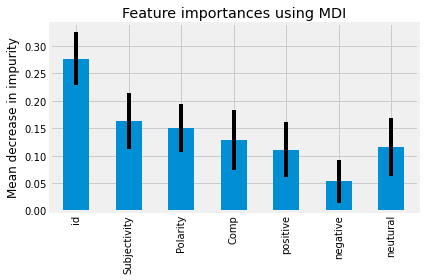

In [94]:
X2_columns = df_model_2.columns[0:7].to_list()
forest_importances = pd.Series(importances, index= X2_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [97]:
# Model 3: Features engineered via the RSI, Relative Strength Index
df_model_3 = df_headlines_merge[columns_RSI]
df_model_3.head()

,sell_points,buy_points,bought_sold,open_class,high_class,low_class,volume_class,label
0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0


In [101]:
# Change label dtype to numeric int64
df_model_3['label'] = pd.to_numeric(df_model_3['label'])
df_model_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sell_points   285 non-null    int64
 1   buy_points    285 non-null    int64
 2   bought_sold   285 non-null    int64
 3   open_class    285 non-null    int64
 4   high_class    285 non-null    int64
 5   low_class     285 non-null    int64
 6   volume_class  285 non-null    int64
 7   label         285 non-null    int64
dtypes: int64(8)
memory usage: 17.9 KB


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
#Create the feature data set
X3 = df_model_3
#
X3 = np.array(X3.drop(['label'], 1))
# Target dataset
y3 = np.array(df_model_3['label'])

In [103]:
# Split the data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state =0)

In [104]:
#Create and train the model
#Instatiate
LDA = LinearDiscriminantAnalysis()
model = LDA.fit(x_train, y_train)

In [105]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.82      0.80      0.81        41

    accuracy                           0.74        57
   macro avg       0.68      0.68      0.68        57
weighted avg       0.74      0.74      0.74        57



In [106]:
# Create and train the model
#Instatiate
rf_classifier = RandomForestClassifier(n_estimators=100)
model = rf_classifier.fit(x_train, y_train)

In [107]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.95      0.90      0.92        41

    accuracy                           0.89        57
   macro avg       0.86      0.89      0.87        57
weighted avg       0.90      0.89      0.90        57



In [108]:
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

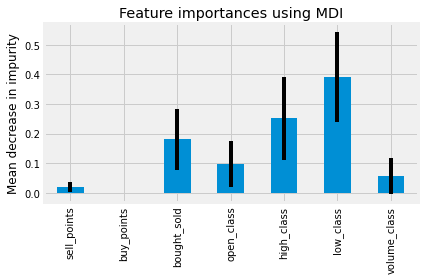

In [109]:
X3_columns = df_model_3.columns[0:7].to_list()
forest_importances = pd.Series(importances , index= X3_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [110]:

df_model_4 = df_headlines_merge[columns_hd]
df_model_4.head()

,open_prev,high_prev,low_prev,volume_prev,label
0,2436.01,2483.98,2168.12,42089937660,0
1,2436.01,2483.98,2168.12,42089937660,0
2,2436.01,2483.98,2168.12,42089937660,0
3,2436.01,2483.98,2168.12,42089937660,0
4,2436.01,2483.98,2168.12,42089937660,0


In [111]:
df_model_4['label'] = pd.to_numeric(df_model_4['label'])
df_model_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_prev    285 non-null    float64
 1   high_prev    285 non-null    float64
 2   low_prev     285 non-null    float64
 3   volume_prev  285 non-null    int64  
 4   label        285 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 11.3 KB


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
#Create the feature data set
X4 = df_model_4
X4 = np.array(X4.drop(['label'], 1))
# Target dataset
y4 = np.array(df_model_4['label'])

In [113]:
# Split the data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.2, random_state =0)

In [114]:
#Create and train the model
#Instatiate
LDA = LinearDiscriminantAnalysis()
model = LDA.fit(x_train, y_train)

In [115]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.82      0.90      0.86        41

    accuracy                           0.79        57
   macro avg       0.74      0.70      0.72        57
weighted avg       0.78      0.79      0.78        57



In [116]:
# Create and train the model
#Instatiate
rf_classifier = RandomForestClassifier(n_estimators=100)
model = rf_classifier.fit(x_train, y_train)

In [117]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        41

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [118]:
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

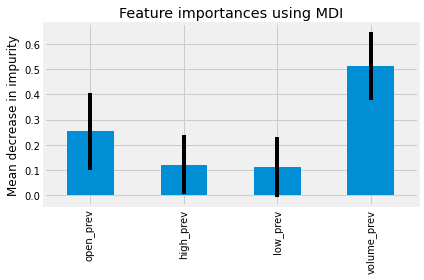

In [120]:
X4_columns = df_model_4.columns[0:4].to_list()
forest_importances = pd.Series(importances , index= X4_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [121]:

df_model_5 = df_headlines_merge[columns_sent_RSI]
df_model_5.head()

,id,Subjectivity,Polarity,Comp,positive,negative,neutural,sell_points,buy_points,bought_sold,open_class,high_class,low_class,volume_class,label
0,0,0.250000,0.250000,0.2023,0.107,0.000,0.893,0,0,1,0,0,0,1,0
1,1,0.000000,0.000000,0.0000,0.000,0.000,1.000,0,0,1,0,0,0,1,0
2,2,0.770833,0.054167,-0.3612,0.126,0.335,0.539,0,0,1,0,0,0,1,0
3,3,0.000000,0.000000,0.0000,0.000,0.000,1.000,0,0,1,0,0,0,1,0
4,3,0.000000,0.000000,0.0000,0.000,0.000,1.000,0,0,1,0,0,0,1,0


In [122]:
df_model_5['label'] = pd.to_numeric(df_model_5['label'])
df_model_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            285 non-null    int32  
 1   Subjectivity  285 non-null    float64
 2   Polarity      285 non-null    float64
 3   Comp          285 non-null    float64
 4   positive      285 non-null    float64
 5   negative      285 non-null    float64
 6   neutural      285 non-null    float64
 7   sell_points   285 non-null    int64  
 8   buy_points    285 non-null    int64  
 9   bought_sold   285 non-null    int64  
 10  open_class    285 non-null    int64  
 11  high_class    285 non-null    int64  
 12  low_class     285 non-null    int64  
 13  volume_class  285 non-null    int64  
 14  label         285 non-null    int64  
dtypes: float64(6), int32(1), int64(8)
memory usage: 32.4 KB


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
#Create the feature data set
X5 = df_model_5
X5 = np.array(X5.drop(['label'], 1))
# Target dataset
y5 = np.array(df_model_5['label'])

In [124]:
# Split the data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(X5, y5, test_size = 0.2, random_state =0)

In [125]:
#Create and train the model
#Instatiate
LDA = LinearDiscriminantAnalysis()
model = LDA.fit(x_train, y_train)

In [126]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.82      0.80      0.81        41

    accuracy                           0.74        57
   macro avg       0.68      0.68      0.68        57
weighted avg       0.74      0.74      0.74        57



In [127]:
# Create and train the model
#Instatiate
rf_classifier = RandomForestClassifier(n_estimators=100)
model = rf_classifier.fit(x_train, y_train)

In [128]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.93      0.95      0.94        41

    accuracy                           0.91        57
   macro avg       0.90      0.88      0.89        57
weighted avg       0.91      0.91      0.91        57



In [129]:
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

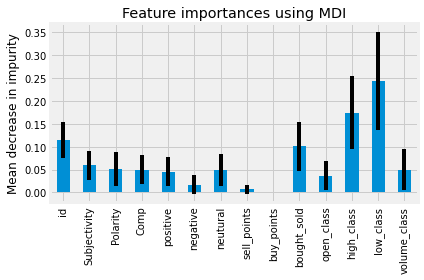

In [131]:
X5_columns = df_model_5.columns[0:14].to_list()
forest_importances = pd.Series(importances , index= X5_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [132]:

df_model_6 = df_headlines_merge[columns_all]
df_model_6.head()

,id,Subjectivity,Polarity,Comp,positive,negative,neutural,sell_points,buy_points,bought_sold,open_class,high_class,low_class,volume_class,open_prev,high_prev,low_prev,volume_prev,label
0,0,0.250000,0.250000,0.2023,0.107,0.000,0.893,0,0,1,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
1,1,0.000000,0.000000,0.0000,0.000,0.000,1.000,0,0,1,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
2,2,0.770833,0.054167,-0.3612,0.126,0.335,0.539,0,0,1,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
3,3,0.000000,0.000000,0.0000,0.000,0.000,1.000,0,0,1,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0
4,3,0.000000,0.000000,0.0000,0.000,0.000,1.000,0,0,1,0,0,0,1,2436.01,2483.98,2168.12,42089937660,0


In [133]:
df_model_6['label'] = pd.to_numeric(df_model_6['label'])
df_model_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            285 non-null    int32  
 1   Subjectivity  285 non-null    float64
 2   Polarity      285 non-null    float64
 3   Comp          285 non-null    float64
 4   positive      285 non-null    float64
 5   negative      285 non-null    float64
 6   neutural      285 non-null    float64
 7   sell_points   285 non-null    int64  
 8   buy_points    285 non-null    int64  
 9   bought_sold   285 non-null    int64  
 10  open_class    285 non-null    int64  
 11  high_class    285 non-null    int64  
 12  low_class     285 non-null    int64  
 13  volume_class  285 non-null    int64  
 14  open_prev     285 non-null    float64
 15  high_prev     285 non-null    float64
 16  low_prev      285 non-null    float64
 17  volume_prev   285 non-null    int64  
 18  label         285 non-null    

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
#Create the feature data set
X6 = df_model_6
X6 = np.array(X6.drop(['label'], 1))
# Target dataset
y6 = np.array(df_model_6['label'])

In [135]:
# Split the data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(X6, y6, test_size = 0.2, random_state =0)

In [136]:
#Create and train the model
#Instatiate
LDA = LinearDiscriminantAnalysis()
model = LDA.fit(x_train, y_train)

In [137]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.95      0.98      0.96        41

    accuracy                           0.95        57
   macro avg       0.94      0.93      0.93        57
weighted avg       0.95      0.95      0.95        57



In [138]:
# Create and train the model
#Instatiate
rf_classifier = RandomForestClassifier(n_estimators=100)
model = rf_classifier.fit(x_train, y_train)

In [139]:
# Show the models prediction
pred = model.predict(x_test)

# show the model metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        41

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [140]:
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

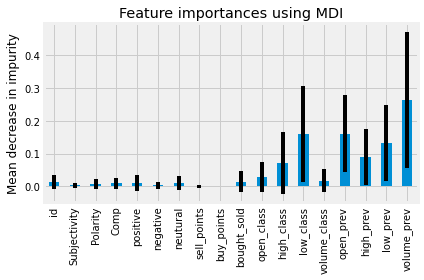

In [142]:
X6_columns = df_model_6.columns[0:18].to_list()
forest_importances = pd.Series(importances , index= X6_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()